In [1]:
# Eigenfaces 
# будем вычищать морды таким образом - чтобы они узнавались на распознавании

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
from sklearn.decomposition import PCA 
pca = PCA(150, svd_solver="randomized", random_state=42)
pca.fit(faces.data)

PCA(n_components=150, random_state=42, svd_solver='randomized')

/tmp/ipykernel_606243/2637041075.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


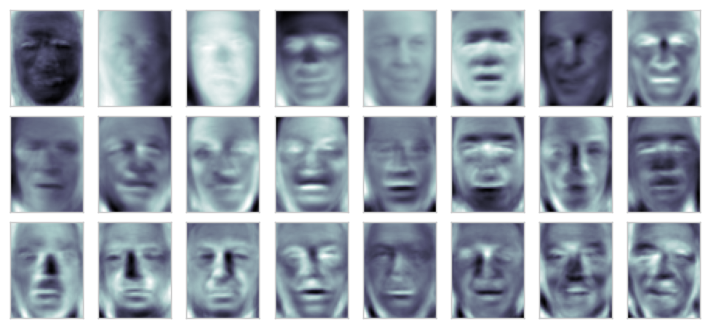

In [4]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

fig,axes = plt.subplots(3,8, figsize=(9,4),
                        subplot_kw={"xticks":[], "yticks":[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap="bone")

Text(0, 0.5, 'cumulative explained variance')

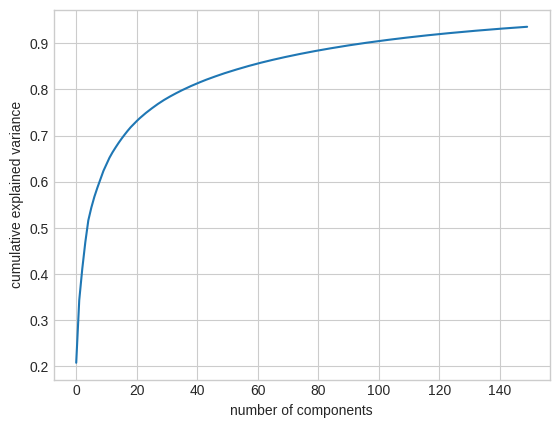

In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [6]:
# compute the components and projected faces 
# как видим мы можем восстановить оригинальный дата сет из того что получили 
# в результате PCA обработки

pca = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

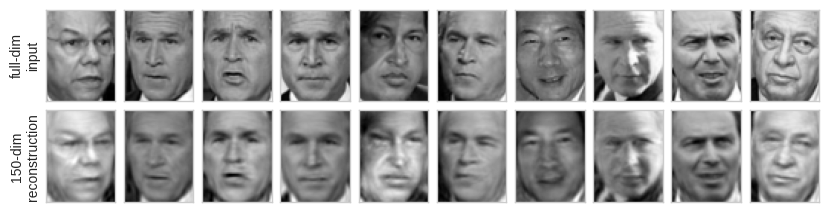

In [8]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');